In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('/content/drive/MyDrive/DeepLearningProject/SurfaceCracks')

Text(0.5, 1.0, 'Number of Images')

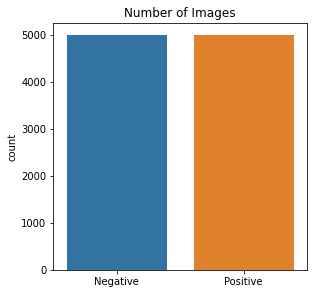

In [ ]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [ ]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

In [ ]:
x.shape

(10008, 120, 120, 1)

In [ ]:
y.shape

(10008,)

(-0.5, 119.5, 119.5, -0.5)

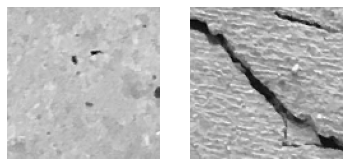

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(x[1006].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[5300].reshape(img_size, img_size), cmap='gray')
plt.axis('off')


In [ ]:
y[1006]

0

In [ ]:
y[5300]

1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, train_size=0.8, random_state=42)

CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

Model Training

In [ ]:
opt = Adam(lr=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 
history = model.fit(X_train, y_train, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)

Epoch 1/15
47/47 [==============================] - 24s 253ms/step - loss: 0.5743 - accuracy: 0.7230 - val_loss: 0.6770 - val_accuracy: 0.8302
Epoch 2/15
47/47 [==============================] - 9s 200ms/step - loss: 0.3547 - accuracy: 0.8937 - val_loss: 0.6489 - val_accuracy: 0.9236
Epoch 3/15
47/47 [==============================] - 9s 201ms/step - loss: 0.2390 - accuracy: 0.9257 - val_loss: 0.6148 - val_accuracy: 0.9505
Epoch 4/15
47/47 [==============================] - 9s 201ms/step - loss: 0.1766 - accuracy: 0.9410 - val_loss: 0.5724 - val_accuracy: 0.9600
Epoch 5/15
47/47 [==============================] - 9s 201ms/step - loss: 0.1499 - accuracy: 0.9504 - val_loss: 0.5320 - val_accuracy: 0.9680
Epoch 6/15
47/47 [==============================] - 9s 201ms/step - loss: 0.1301 - accuracy: 0.9595 - val_loss: 0.4769 - val_accuracy: 0.9665
Epoch 7/15
47/47 [==============================] - 9s 201ms/step - loss: 0.1187 - accuracy: 0.9599 - val_loss: 0.4052 - val_accuracy: 0.9600
Epoch

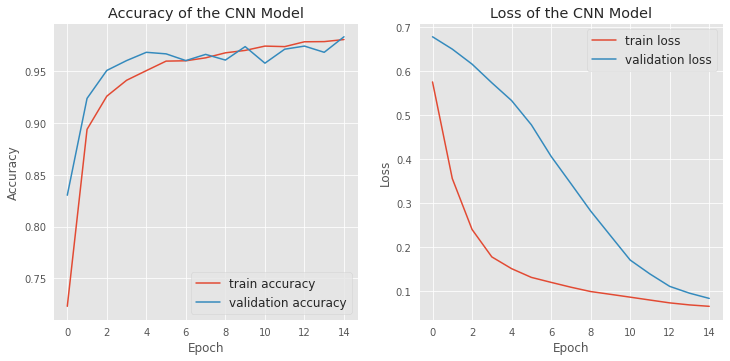

In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the CNN Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the CNN Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

Model Testing

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN score: 97.95%
CNN Error: 2.05%
